In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df=pd.read_csv('Data_cleaned.csv')

In [184]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [185]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [186]:
df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [187]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [188]:
#we know that the year is a common factor.Therefore we separate the date of journey into month and date only
df['Day_of_Journey']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [189]:
df['Month_of_Journey']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [190]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [191]:
df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [192]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [193]:
#separting the departure time into hours and minutes columns
df['Departure_Hour']=pd.to_datetime(df.Dep_Time).dt.hour

In [194]:
df['Departure_Minute']=pd.to_datetime(df.Dep_Time).dt.minute

In [195]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [196]:
df.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [197]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [198]:
#separting the arrival time into hours and minutes
df['Arrival_Hour']=pd.to_datetime(df.Arrival_Time).dt.hour

In [199]:
df['Arrival_Minute']=pd.to_datetime(df.Arrival_Time).dt.minute

In [200]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [201]:
df.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [202]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [203]:
#splitting the duration column into hours and minutes columns resectively
df['Duration_hour']=[i.split("h")[0] for i in df['Duration']]

In [204]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if (len(duration[i].split())!=2):
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + '0m'
        else:
            duration[i]='0h' + duration[i]

In [205]:
df['Duration']=duration

In [206]:
df['Duration_minute']=[i.split('h')[1].split('m')[0].strip() for i in df['Duration']]

In [207]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [208]:
df.drop(columns=['Duration'],axis=1,inplace=True)

In [209]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [210]:
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [211]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [212]:
df.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


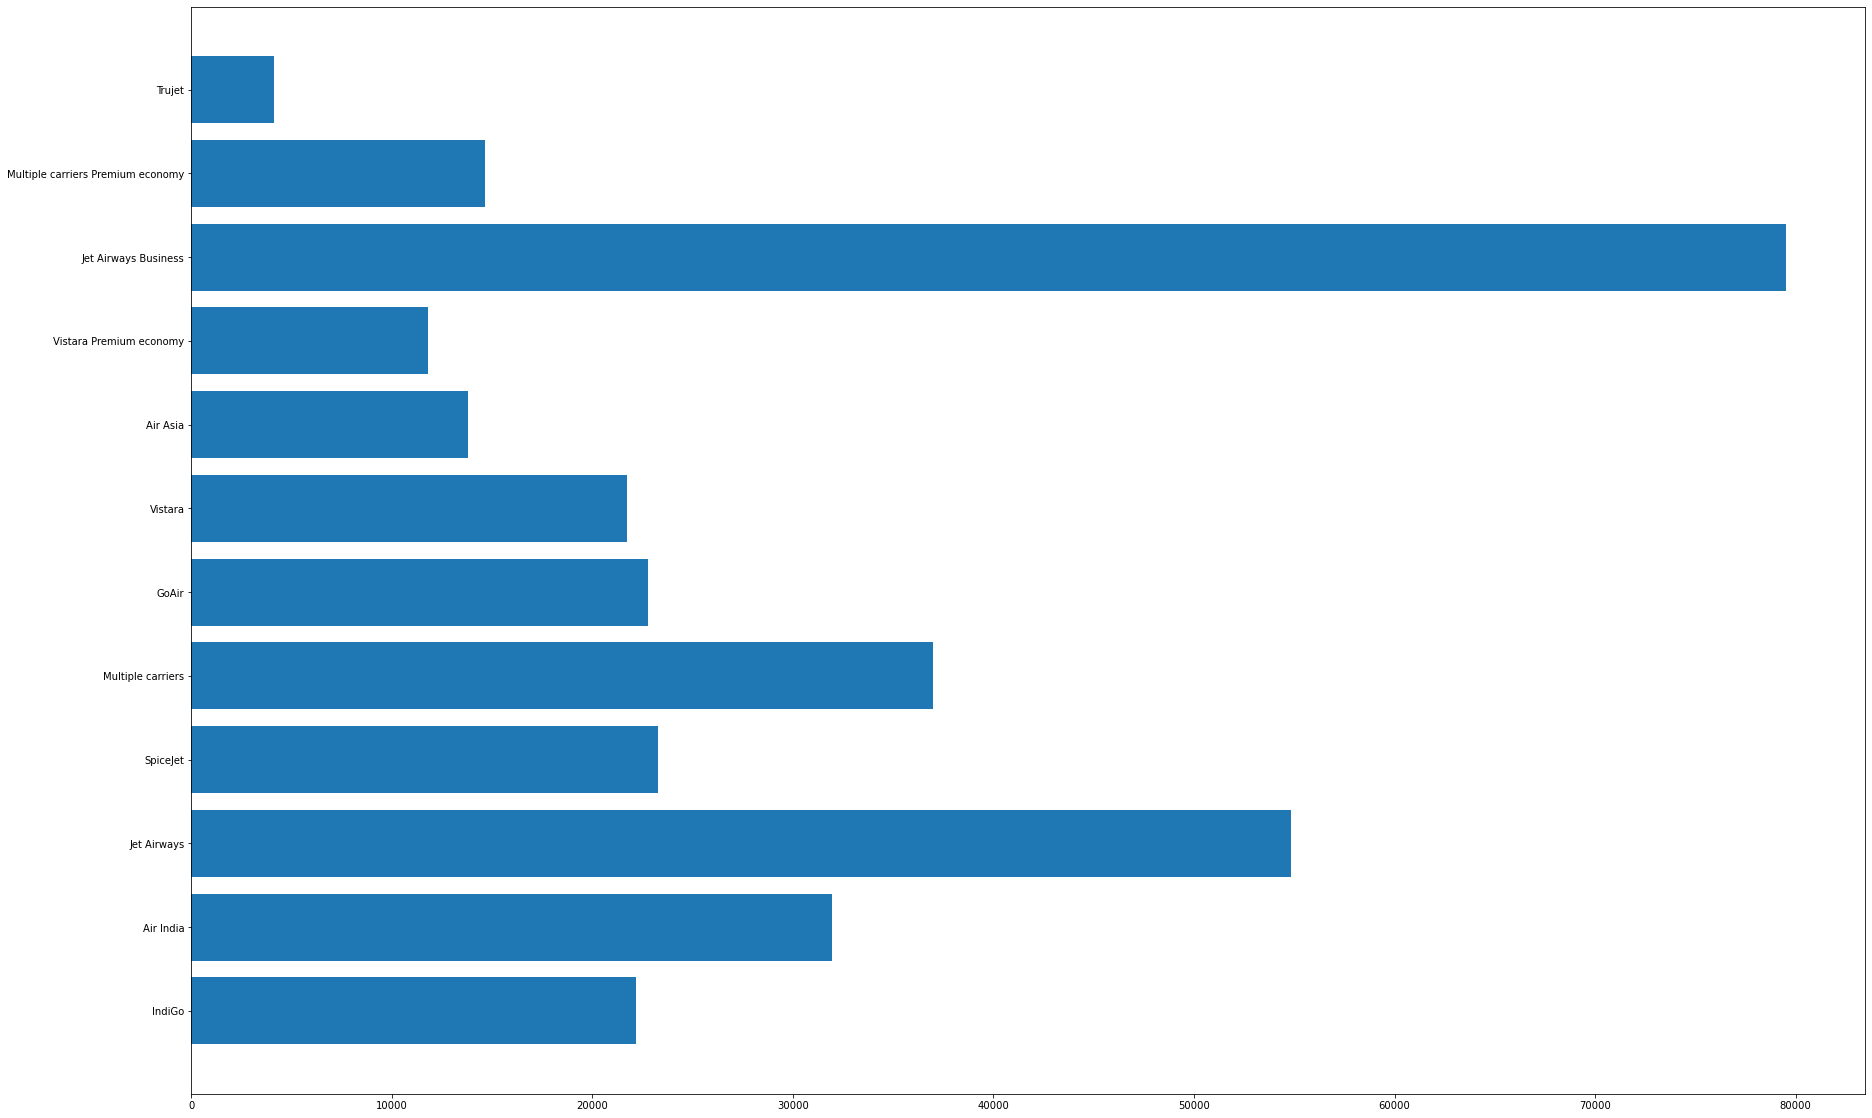

In [213]:
#visualizing the costliest airlines
name = df['Airline'] 
price = df['Price'] 
  
# Figure Size 
fig = plt.figure(figsize =(30, 20)) 
  
# Horizontal Bar Plot 
plt.barh(name, price) 
  
# Show Plot 
plt.show() 



In [214]:
#Analysis for which place has the highest departures as well as arrivals
df_cat=df[['Source','Destination']]

graph for Source: total = 5


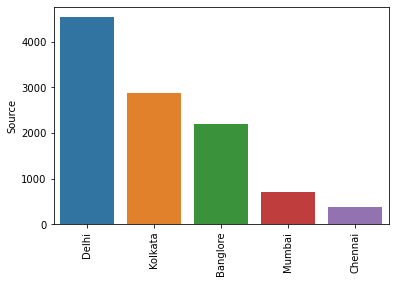

graph for Destination: total = 6


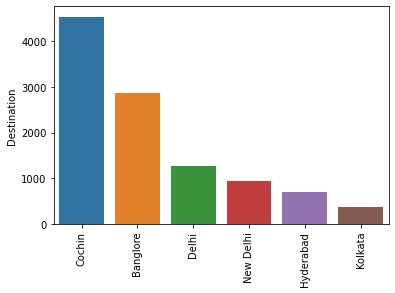

In [215]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [216]:
#Analysis for which airline route costs more
pd.pivot_table(df,index=['Source','Destination'],values='Price').sort_values('Price',ascending=False)

,,Price
Source,Destination,
Banglore,New Delhi,11917.716738
Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Banglore,Delhi,5143.918577
Mumbai,Hyderabad,5059.708752
Chennai,Kolkata,4789.892388


In [218]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Day_of_Journey', 'Month_of_Journey', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hour',
       'Duration_minute'],
      dtype='object')

<AxesSubplot:>

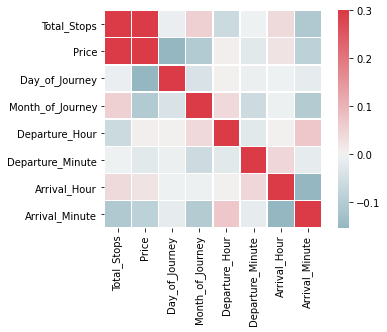

In [219]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Price','Day_of_Journey', 'Month_of_Journey', 'Departure_Hour','Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hour','Duration_minute']].corr(),vmax=.3,center=0,linewidths=.5,cmap=cmap,square=True)

In [217]:
df.to_csv('data_explored.csv',index=False)